Demonstrates the functionality of this using existing tile datasets.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tile_stitcher import get_raster_from_tiles
from tile_stitcher.stitcher import DATASET_SHORTNAMES
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
from tile_stitcher.stitcher import HANSEN_MOSAIC_YEARS

In [3]:
DATASET_SHORTNAMES

['peckel_water_occ_2021',
 'esa_world_cover_2020',
 'esa_world_cover_2021',
 'hansen_annual_mosaic',
 's1_coherence_2020']

# ESA 2021 Worldcover

In [4]:
%%time

bounds = [-120.55, 34.85, -120.25, 35.15]

X, p = get_raster_from_tiles(bounds, tile_shortname='esa_world_cover_2021')
X.shape

CPU times: user 446 ms, sys: 55.1 ms, total: 501 ms
Wall time: 7.49 s


(1, 3600, 3600)

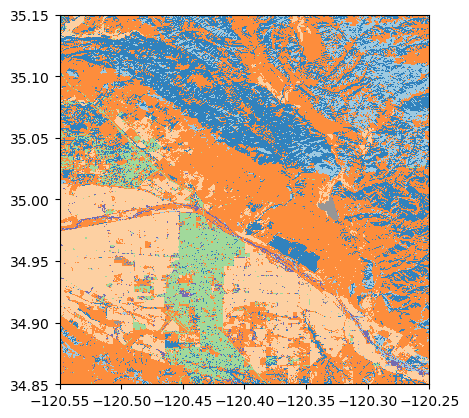

<Axes: >

In [5]:
show(X, transform=p['transform'], cmap='tab20c', interpolation='none')

In [6]:
import rasterio

with rasterio.open('esa_worlf_cover_2021_subset.tif', 'w', **p) as ds:
   ds.write(X)

# Hansen Annual Mosaic

In [7]:
HANSEN_MOSAIC_YEARS

[2000, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [8]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2000, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=HANSEN_MOSAIC_YEARS[0])
X_2000.shape

CPU times: user 91.3 ms, sys: 68.5 ms, total: 160 ms
Wall time: 2.83 s


(4, 400, 400)

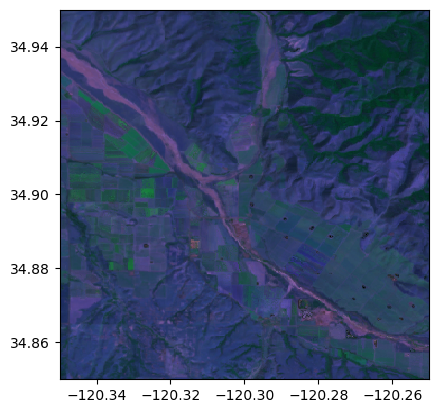

<Axes: >

In [9]:
show(X_2000[:3,...], transform=p['transform'], interpolation='none')

https://storage.googleapis.com/earthenginepartners-hansen/GFC2015/Hansen_GFC2015_treecover2000_30N_120W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC2015/Hansen_GFC2014_irst_40N_130W.tif

In [10]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2020, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=HANSEN_MOSAIC_YEARS[3])
X_2020.shape

CPU times: user 79 ms, sys: 69.8 ms, total: 149 ms
Wall time: 2.72 s


(4, 400, 400)

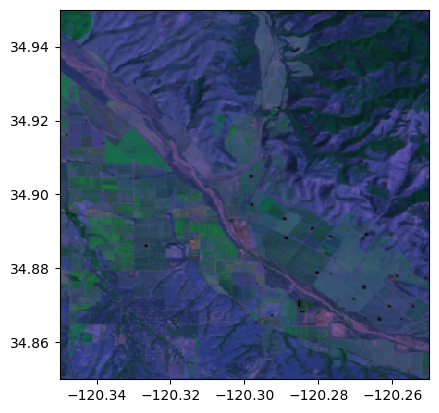

<Axes: >

In [11]:
show(X_2020[:3,...], transform=p['transform'], interpolation='none')

# Pekel

In [12]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_pekel, p = get_raster_from_tiles(bounds, 
                                   tile_shortname='peckel_water_occ_2021')
X_pekel.shape

CPU times: user 68.3 ms, sys: 23 ms, total: 91.3 ms
Wall time: 2.28 s


(1, 2400, 1200)

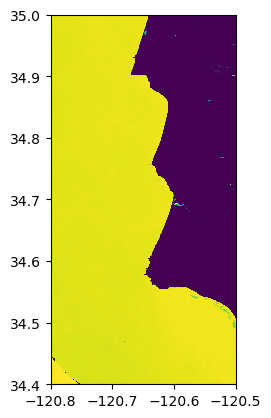

<Axes: >

In [13]:
show(X_pekel, transform=p['transform'], interpolation='none', vmin=0, vmax=100)

# S1 Coherence 2020

It takes a bit longer to load because the tiles for all the various seasons and temporal baselines are stored (and read) together.

In [14]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_coh, p_coh = get_raster_from_tiles(bounds, 
                                     tile_shortname='s1_coherence_2020',
                                     season='fall',
                                     temporal_baseline_days=12)
X_coh.shape

CPU times: user 6.77 s, sys: 165 ms, total: 6.93 s
Wall time: 9.45 s


(1, 721, 361)

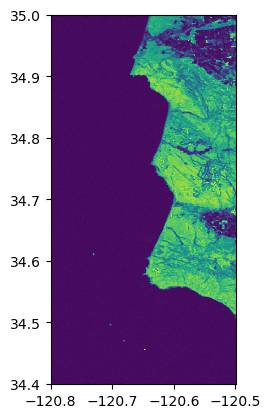

<Axes: >

In [15]:
show(X_coh, 
     transform=p_coh['transform'], 
     interpolation='none', 
     vmin=0, vmax=100)